<a href="https://colab.research.google.com/github/Rajeswari0410/Demo_test/blob/master/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np 
import re
import os 
from imutils import paths
from PIL import Image
from google.colab.patches import cv2_imshow 
import smtplib, ssl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,795 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
import pytesseract
img_path = "/content/drive/MyDrive/pn37/FraudDetection/h1.PNG"

def get_name(img_path):
    # Read image with opencv
    img = cv2.imread(img_path)

    # Convert to gray
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply dilation and erosion to remove some noise
    kernel = np.ones((1, 1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)

    # Write image after removed noise
    cv2.imwrite("removed_noise.png", img)

    # Write the image after apply opencv to do some ...
    cv2.imwrite(img_path, img)

    # Recognize text with tesseract for python
    result = pytesseract.image_to_string(Image.open(img_path))
   
    x=result.find("Name")
    y=result.find("Roll")
    
    name=result[x+6:y-1].strip()
    roll=result[y+5:y+22].strip()
    roll=re.sub('\D', '', roll)
    return name, roll
n,roll=get_name(img_path)

In [ ]:
print(n)

SEJAL SUDHAKAR CHHABILE


In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 23 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=4eb9bd58b6ca6a13fa48788dcb8c85416aeded1d80df413049589f9a00da887f
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import face_recognition

In [ ]:
import pandas as pds
data=pds.read_excel("/content/drive/MyDrive/pn37/FraudDetection/seatarrangement.xlsx")
a=int(data[data["NAME"]==n]["ROLL NO."])

In [ ]:
print(a)

22050803003


In [ ]:
print(roll)

22050803003


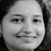

-1

In [ ]:
import cv2
imagePath = "/content/drive/MyDrive/pn37/FraudDetection/h1.PNG"
faceCascade = cv2.CascadeClassifier("/content/drive/MyDrive/pn37/FraudDetection/haarcascade_frontalface_alt.xml")
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)


# Draw a rectangle around the faces
(x, y, w, h) = faces[0]

cv2_imshow(image[y:y+h,x:x+w])
cv2.waitKey(0)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  ic = Image(filename)
  display(Image(filename))
  cv2.imwrite('/content/drive/MyDrive/pn37/FraudDetection',ic)
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

['SANKET SUNIL JOGI', 'SHUBHAM JAYSINGH THAKUR', 'PRIYAM SHARMA', 'SEJAL SUDHAKAR CHHABILE', 'RAJI']
SEJAL SUDHAKAR CHHABILE
['SEJAL SUDHAKAR CHHABILE']


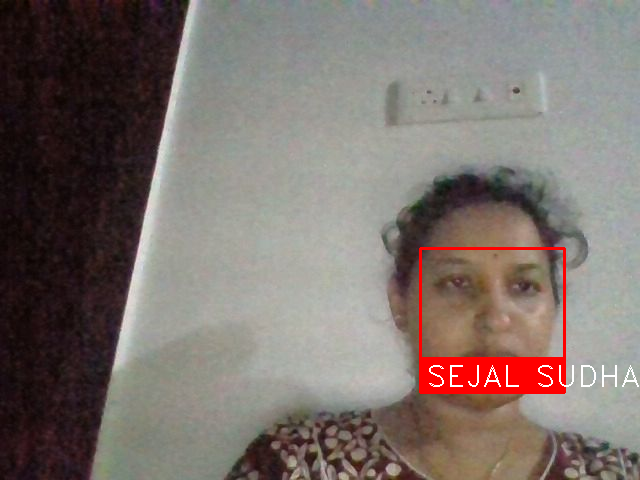

all the best


In [ ]:
# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(0)

# Load a sample picture and learn how to recognize it.
from imutils import paths
images=list(paths.list_images("/content/drive/MyDrive/pn37/FraudDetection/knownphotos"))
known_faces_encodings=[]
known_faces_names=[]
for i in range(len(images)):
  image = face_recognition.load_image_file(images[i])
  face_encoding = face_recognition.face_encodings(image)[0]
  name=images[i].split("/")[-1].split(".")[0]
  known_faces_encodings.append(face_encoding)
  known_faces_names.append(name)

print(known_faces_names)
# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

if n in known_faces_names and int(float(a))==int(float(roll)):
    # Grab a single frame of video
    frame=cv2.imread("/content/photo.jpg")
    faceCascade = cv2.CascadeClassifier("/content/drive/MyDrive/pn37/FraudDetection/haarcascade_frontalface_alt.xml")
    image = cv2.imread("/content/drive/MyDrive/pn37/FraudDetection/h1.PNG")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
    )
    (x, y, w, h)=faces[0]
    hallticket_image=image[y:y+h,x:x+w][:,:,::-1]
    hallticket_locations=face_recognition.face_locations(hallticket_image)
    hallticket_image_encodings=face_recognition.face_encodings(hallticket_image,hallticket_locations)
    hallticket_matches=face_recognition.compare_faces(known_faces_encodings,hallticket_image_encodings[0])
    hallticket_distances=face_recognition.face_distance(known_faces_encodings, hallticket_image_encodings[0])
    match_index=np.argmin(hallticket_distances)
    hallticket_name="unknown"
    if hallticket_matches[match_index]:
      hallticket_name = known_faces_names[match_index]
    print(hallticket_name)

    # Resize frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_small_frame = small_frame[:, :, ::-1]

    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)
        #print(face_encodings)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_faces_encodings, face_encoding)
            name = "Unknown"

            # # If a match was found in known_face_encodings, just use the first one.
            # if True in matches:
            #     first_match_index = matches.index(True)
            #     name = known_face_names[first_match_index]

            # Or instead, use the known face with the smallest distance to the new face
            face_distances = face_recognition.face_distance(known_faces_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_faces_names[best_match_index]
            face_names.append(name)
    print(face_names)
    if face_names[0]==hallticket_name:
    # Display the results
        for (top, right, bottom, left), name in zip(face_locations, face_names):
            # Scale back up face locations since the frame we detected in was scaled to 1/4 size
            top *= 4
            right *= 4
            bottom *= 4
            left *= 4

        # Draw a box around the face
            cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
            cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
        cv2_imshow(frame)
        print("all the best")
    if face_names[0]!=hallticket_name:
      print("fraud face")

    # Hit 'q' on the keyboard to quit!
    #if cv2.waitKey(1) & 0xFF == ord('q'):
    #print(face_distances)
    #print(known_faces_names)
else:
  print("name or roll no. doesn't match")
  port = 587  # For starttls
  smtp_server = "smtp.gmail.com"
  sender_email = "priyams654@gmail.com"
  receiver_email = "sejalchhabile@gmail.com"
  password = input("Type your password and press enter:")
  message = """\
  Subject: Fraud Detection

  Fraud Detection message sent from Python."""

  context = ssl.create_default_context()
  with smtplib.SMTP(smtp_server, port) as server:
      server.ehlo()  # Can be omitted
      server.starttls(context=context)
      server.ehlo()  # Can be omitted
      server.login(sender_email, password)
      server.sendmail(sender_email, receiver_email, message)

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()